## Problem Statement: Predict the employee attrition for an Insurance Company

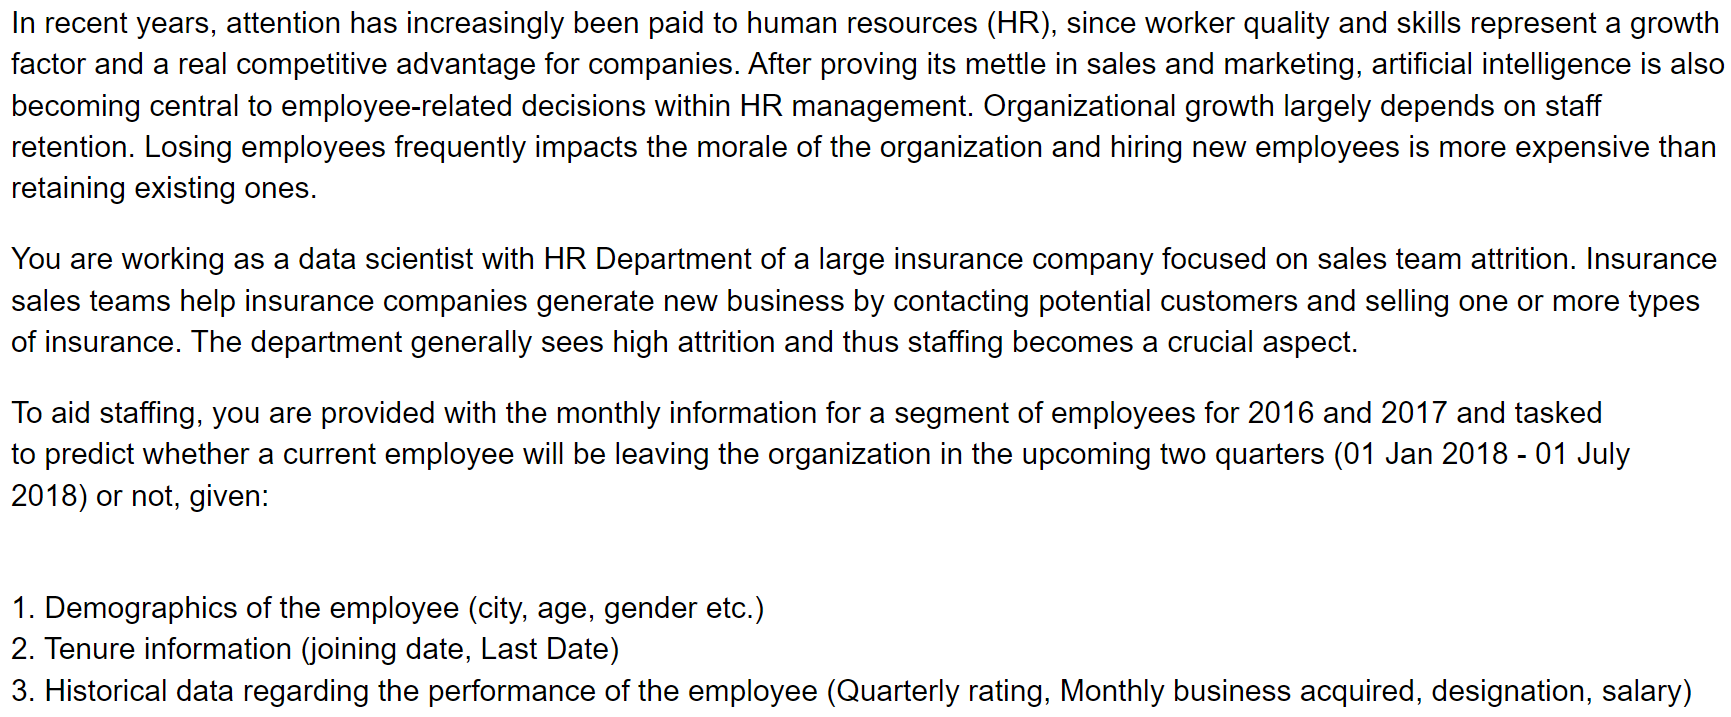

**This is a classification problem where we need to identify if the employee leaves the organization or not based on thw quaterly rating of the employee, monthly business acquired, designation. This is a binary classification.**

## Loading the packages : dependencies

In [1]:
import random
#For dealing with tables
import pandas as pd
#For dealing with linear algebra
import numpy as np
#For data visualization and plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
#For minmaxscaler
from sklearn.preprocessing import MinMaxScaler
#For shapiro test
from scipy.stats import shapiro
#For train-test split
from sklearn.model_selection import train_test_split,GridSearchCV
#For RandomForest
from sklearn.ensemble import RandomForestClassifier
#Accuracy score, confusion matrix, classification report, ROC curve, AUC
from sklearn.metrics import f1_score
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset
- Train data: It contains the independent variables.
- Test data: It contains only the employee id.

In [2]:
#Train Data
train_df = pd.read_csv("C:\\Users\\Magna Peius\\Desktop\\Analytics_Vidhya\\Jobathon\\train_MpHjUjU.csv")
#Test Data
test_df = pd.read_csv("C:\\Users\\Magna Peius\\Desktop\\Analytics_Vidhya\\Jobathon\\test_hXY9mYw.csv")

**Creating a copy of the datasets so that even if we do some changes in the dataset, the orginial dataset is preserved.**

In [3]:
#Copy of train_df
train_data=train_df.copy()
#Copy of test_df
test_data=test_df.copy()

In [4]:
#The first 5 rows of train_data
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


## Understanding the data

### Column Names 

In [5]:
#Features of the train data
print("The features or column names of the train data are : \n",train_data.columns)

The features or column names of the train data are : 
 Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')


**There are 13 independent variables in the train data.**

In [6]:
#Features of the test data
print("The features or column names of the test data are : \n",test_data.columns)

The features or column names of the test data are : 
 Index(['Emp_ID'], dtype='object')


**There is just one column in test data which is the Emp_ID.**

### Data Dictionary

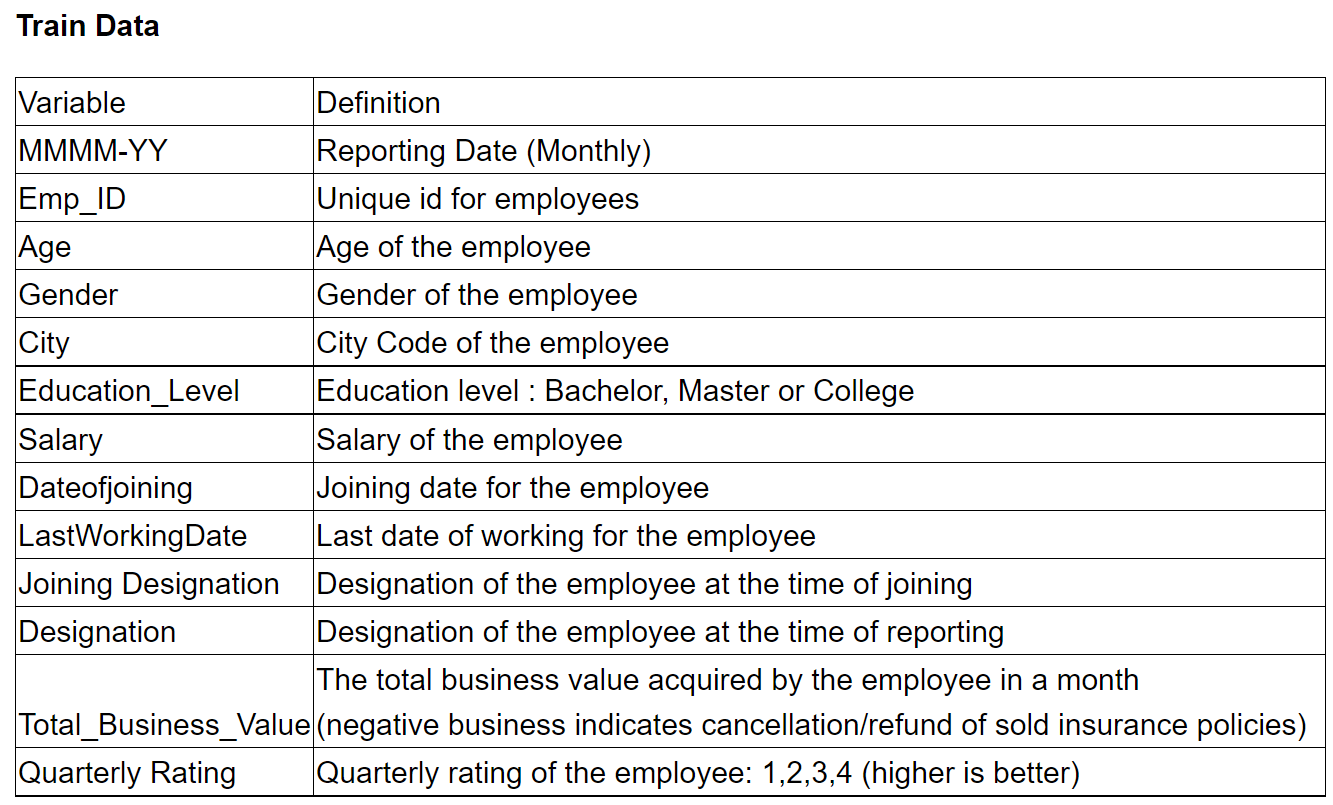

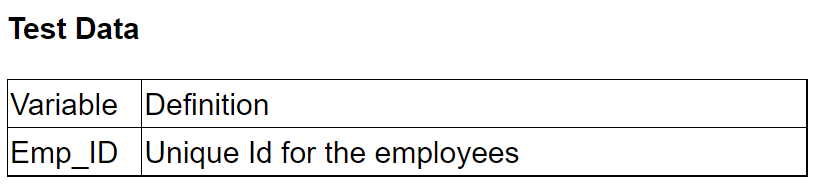

### Data types of the features

In [7]:
#data types of each variable in the train data
print(train_data.dtypes)

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
dtype: object


**We need to convert the MMM-YY,Dateofjoining,LastWorkingDate columns into datetime type.**

In [8]:
##Converting 'MMM-YY' feature to datetime type
train_data['MMM-YY'] = pd.to_datetime(train_data['MMM-YY'],format="%Y-%m-%d")

##Converting 'Dateofjoining' feature to datetime type
train_data['Dateofjoining'] = pd.to_datetime(train_data['Dateofjoining'],format="%Y-%m-%d")

##Converting 'LastWorkingDate' feature to datetime type
train_data['LastWorkingDate'] = pd.to_datetime(train_data['LastWorkingDate'],format="%Y-%m-%d")

In [9]:
#Checking if the changes are done
train_data.dtypes

MMM-YY                  datetime64[ns]
Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Designation                      int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

- Categorical variables in the train dataset: Gender, City, Education_Level, Joining Designation, Designation, Quarterly Rating
- Numerical variables in the train dataset: Age, Salary, Total Business Value

### Shape of the dataset

In [10]:
#Shape of the train data
print("train_data shape : ",train_data.shape)

#Shape of the test data
print("test_data shape : ",test_data.shape)

train_data shape :  (19104, 13)
test_data shape :  (741, 1)


- **There are 13 features and 19,104 observations in the train dataset.**
- **There is just one features and 741 observations in the test dataset.**

## Creating a new dataframe which contains the Emp_ID as the primary key, other features and the target variable (Feature Engineering)

In [11]:
#Creating an empty dataframe
df = pd.DataFrame()

In [12]:
#Setting the emp_id as the new column which are unique
df['Emp_ID'] = train_data['Emp_ID'].unique()

#Setting age of the employee which takes the maximum age of the employee
df['Age'] = list(train_data.groupby('Emp_ID',axis=0).max('MMM-YY')['Age'])

#Setting gender of the employee 
df['Gender'] = list(train_data.groupby('Emp_ID').agg({'Gender':'first'})['Gender'])

#Setting the city of the employee 
df['City'] = list(train_data.groupby('Emp_ID').agg({'City':'first'})['City'])

#Setting the education of the employee 
df['Education'] = list(train_data.groupby('Emp_ID').agg({'Education_Level':'last'})['Education_Level'])

#Setting the salary of the employee for one month
df['Salary'] = list(train_data.groupby('Emp_ID').agg({'Salary':'last'})['Salary'])

#Setting the joining designtion of the employee 
df['Joining_Designation'] = list(train_data.groupby('Emp_ID').agg({'Joining Designation':'last'})['Joining Designation'])

#Setting the designtion of the employee at the time of reporting
df['Designation'] = list(train_data.groupby('Emp_ID').agg({'Designation':'last'})['Designation'])

#Setting the total business value acquired by the employee
df['Total_Business_Value'] = list(train_data.groupby('Emp_ID',axis=0).sum('Total Business Value')['Total Business Value'])

##Setting the quarterly rating of the employee
df['Last_Quarterly_Rating'] = list(train_data.groupby('Emp_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [13]:
train_data.groupby('Emp_ID',axis=0).sum('Total Business Value')['Total Business Value']

Emp_ID
1        1715580
2              0
4         350000
5         120360
6        1265000
          ...   
2784    21748820
2785           0
2786     2815090
2787      977830
2788     2298240
Name: Total Business Value, Length: 2381, dtype: int64

In [14]:
#Creating a column which tells if the quarterly rating has increased for that employee 
#for those whose quarterly rating has increased we assign the value 1

#Quarterly rating at the beginning
qrf = train_data.groupby('Emp_ID').agg({'Quarterly Rating':'first'})

#Quarterly rating at the end
qrl = train_data.groupby('Emp_ID').agg({'Quarterly Rating':'last'})

#The dataset which has the employee ids and a bollean value which tells if the rating has increased
qr = (qrl['Quarterly Rating']>qrf['Quarterly Rating']).reset_index()

#the employee ids whose rating has increased
empid = qr[qr['Quarterly Rating']==True]['Emp_ID']

qri = []
for i in df['Emp_ID']:
    if i in empid:
        qri.append(1)
    else:
        qri.append(0)

df['Quarterly_Rating_Increased'] = qri

In [15]:
#Creating a column called target which tells if the person has left the company
#persons who have a last working date will have the value 1

#The dataset which has the employee ids and specifies if last working date is null
lwr = (train_data.groupby('Emp_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()

#The employee ids who do not have last working date
empid = list(lwr[lwr['LastWorkingDate']==True]['Emp_ID'])

target = []
for i in df['Emp_ID']:
    if i in empid:
        target.append(0)
    elif i not in empid:
        target.append(1)
        
df['Target'] = target

In [16]:
#Creating a column which tells if the monthly income has increased for that employee 
#for those whose monthly income has increased we assign the value 1

#Quarterly rating at the beginning
sf = train_data.groupby('Emp_ID').agg({'Salary':'first'})

#Quarterly rating at the end
sl = train_data.groupby('Emp_ID').agg({'Salary':'last'})

#The dataset which has the employee ids and a bollean value which tells if the monthly income has increased
s = (sl['Salary']>sf['Salary']).reset_index()

#the employee ids whose monthly income has increased
empid = s[s['Salary']==True]['Emp_ID']

si = []
for i in df['Emp_ID']:
    if i in empid:
        si.append(1)
    else:
        si.append(0)

df['Salary_Increased'] = si

In [17]:
df.head()

,Emp_ID,Age,Gender,City,Education,Salary,Joining_Designation,Designation,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Salary_Increased
0,1,28,Male,C23,Master,57387,1,1,1715580,2,0,1,0
1,2,31,Male,C7,Master,67016,2,2,0,1,0,0,0
2,4,43,Male,C13,Master,65603,2,2,350000,1,1,1,0
3,5,29,Male,C9,College,46368,1,1,120360,1,0,1,0
4,6,31,Female,C11,Bachelor,78728,3,3,1265000,2,0,0,0


## Statistical Summary

In [18]:
df.describe()

,Emp_ID,Age,Salary,Joining_Designation,Designation,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Salary_Increased
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.663167,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.128097,0.678706,0.015120
std,806.161628,5.983375,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.334268,0.467071,0.122055
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,1.000000,0.000000
75%,2100.000000,37.000000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,0.000000,1.000000,0.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


**There are 2381 employees in the dataset. The minimum age of the employee in the data is 21 years and the maximum age is 58 years. 75% of the employees have their monthly income less than or equal to 75,986 units. 50% of the mployees have acquired 8,17,680 as the their total business value.**

In [19]:
df.describe(include=['O'])

,Gender,City,Education
count,2381,2381,2381
unique,2,29,3
top,Male,C20,Master
freq,1404,152,802


**Most of the employees in the dataset were male, lived in C20 city and have completed their Masters in education.**

## Univariate Analysis: 
**Each features is examined individually.**

### Target Feature

In [20]:
df['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

**Out of 2381 employees, 1616 employees have left the organization.**

In [21]:
df['Target'].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: Target, dtype: float64

**Around 68% employees have left the organization.**

<AxesSubplot:>

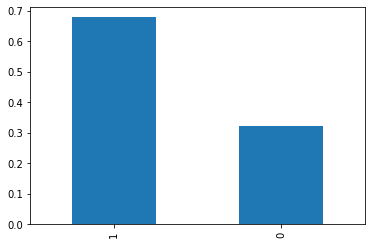

In [22]:
df['Target'].value_counts(normalize=True).plot(kind='bar')

### Categorical Features: Gender, City, Education, Joining_Designation, Designation, Last_Quarterly_Rating, Quarterly_Rating_Increased

In [23]:
#Count of observations in each category
n = ['Gender','City','Education','Joining_Designation','Designation','Last_Quarterly_Rating','Quarterly_Rating_Increased']

for i in n:
    print(df[i].value_counts())
    print("------------------------------------------------------------")

Male      1404
Female     977
Name: Gender, dtype: int64
------------------------------------------------------------
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64
------------------------------------------------------------
Master      802
Bachelor    795
College     784
Name: Education, dtype: int64
------------------------------------------------------------
1    1026
2     815
3     493
4      36
5      11
Name: Joining_Designation, dtype: int64
------------------------------------------------------------
2    855
1    741
3    623
4    138
5     24
Name: Designation, dtype: int64
------------------------------------------------------------
1    1744
2     362
3     168
4     107
Name: Las

- **Out of 2381 employees, 1404 employees are of the Male gender and 977 are females.**
- **Out of 2381 employees, 152 employees are from city C20 and 101 from city C15.**
- **Out of 2381 employees, 802 employees have their education as Masters and 795 have completed their Bachelors.**
- **Out of 2381 employees, 1026 joined with the designation as 1, 815 employees joined with the designation 2.**
- **Out of 2381 employees, 855 employees had their designation as 2 at the time of reporting.**
- **Out of 2381 employees, 1744 employees had their last quarterly rating as 1.**
- **Out of 2381 employees, the quarterly rating has not increased for 2076 employees.**

In [24]:
#Proportion of observations in each category
n = ['Gender','City','Education','Joining_Designation','Designation','Last_Quarterly_Rating','Quarterly_Rating_Increased']

for i in n:
    print(df[i].value_counts(normalize=True))
    print("------------------------------------------------------------")

Male      0.589668
Female    0.410332
Name: Gender, dtype: float64
------------------------------------------------------------
C20    0.063839
C15    0.042419
C29    0.040319
C26    0.039059
C8     0.037379
C27    0.037379
C10    0.036119
C16    0.035279
C22    0.034439
C3     0.034439
C28    0.034439
C12    0.034019
C5     0.033599
C1     0.033599
C21    0.033179
C14    0.033179
C6     0.032759
C4     0.032339
C7     0.031919
C9     0.031499
C25    0.031079
C23    0.031079
C24    0.030659
C19    0.030239
C2     0.030239
C17    0.029819
C13    0.029819
C18    0.028979
C11    0.026879
Name: City, dtype: float64
------------------------------------------------------------
Master      0.336833
Bachelor    0.333893
College     0.329273
Name: Education, dtype: float64
------------------------------------------------------------
1    0.430911
2    0.342293
3    0.207056
4    0.015120
5    0.004620
Name: Joining_Designation, dtype: float64
----------------------------------------------------

- **Around 59% employees are of the Male gender.**
- **Around 6.4% employees are from city C20 and 4.2% from city C15.**
- **The proportion of the employees who have completed their Masters and Bachelors is approximately same.**
- **Around 43% of the employees joined with the designation 1.**
- **At the time of reporting, 34% of the employees had their designation as 2.**
- **Around 73% of the employees had their last quarterly rating as 1.**
- **The quarterly rating has not increased for around 87% employees.**

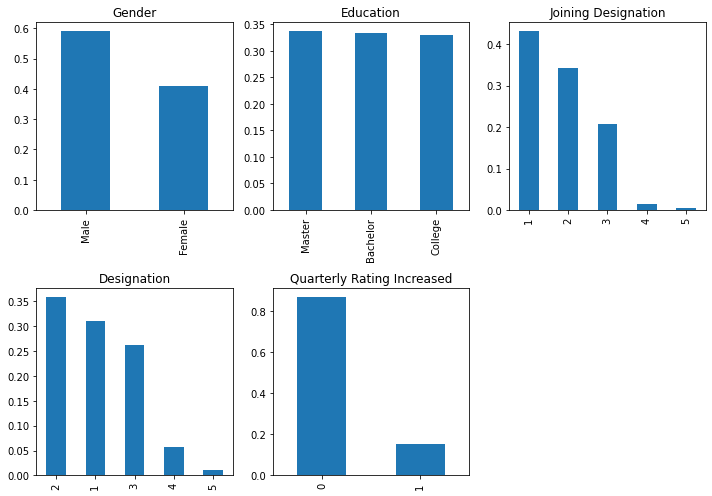

In [25]:
n = ['Gender','City','Joining_Designation','Designation','Last_Quarterly_Rating','Quarterly_Rating_Increased']

plt.subplots(figsize=(10,7))
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

plt.subplot(232)
df['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(233)
df['Joining_Designation'].value_counts(normalize=True).plot.bar(title='Joining Designation')

plt.subplot(234)
df['Designation'].value_counts(normalize=True).plot.bar(title='Designation')

plt.subplot(235)
df['Last_Quarterly_Rating'].value_counts(normalize=True).plot.bar(title='Last Quarterly Rating')

plt.subplot(235)
df['Quarterly_Rating_Increased'].value_counts(normalize=True).plot.bar(title='Quarterly Rating Increased')
plt.tight_layout()

<AxesSubplot:title={'center':'City'}>

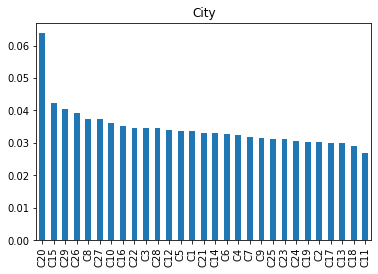

In [26]:
df['City'].value_counts(normalize=True).plot.bar(title='City')

### Numerical Features: Age, Monthly Income ,Total Business Value

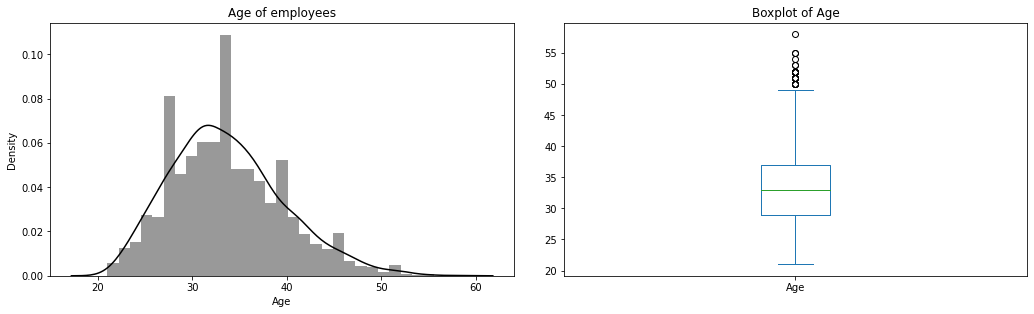

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['Age'],color='black')
plt.title("Age of employees")
plt.subplot(122)
df['Age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)

**There are few outliers in the Age. The distribution is towards the right.**

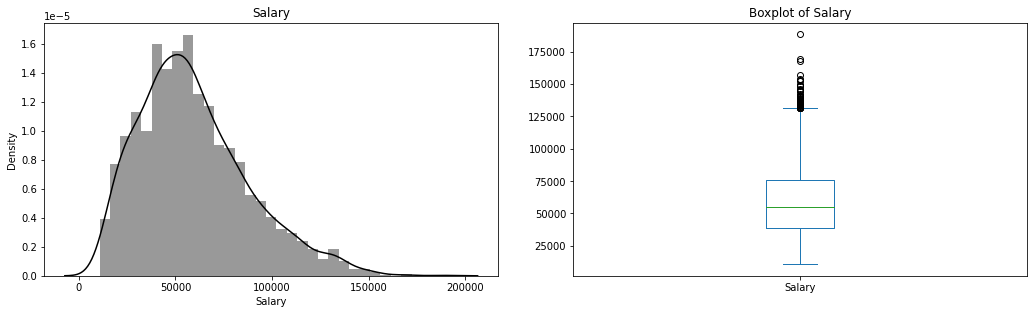

In [28]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['Salary'],color='black')
plt.title("Salary")
plt.subplot(122)
df['Salary'].plot.box(title='Boxplot of Salary')
plt.tight_layout(pad=3)

**The distribution of Salary is towards the right and there are outliers for this feature as well.**

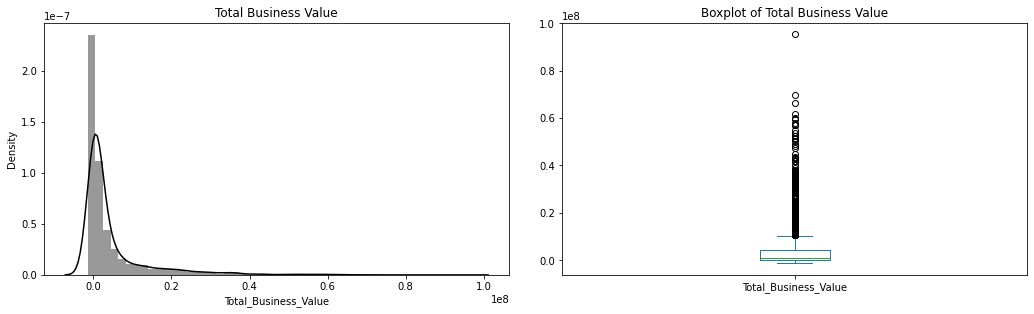

In [29]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['Total_Business_Value'],color='black')
plt.title("Total Business Value")
plt.subplot(122)
df['Total_Business_Value'].plot.box(title='Boxplot of Total Business Value')
plt.tight_layout(pad=3)

**The distribution of total business value is towards the right. There are a lot of outliers for the feature Total Business Value.**

## Bivariate Analysis:
**We look at how each feature is related with the target feature.**

### Categorical variables with the Target Variable

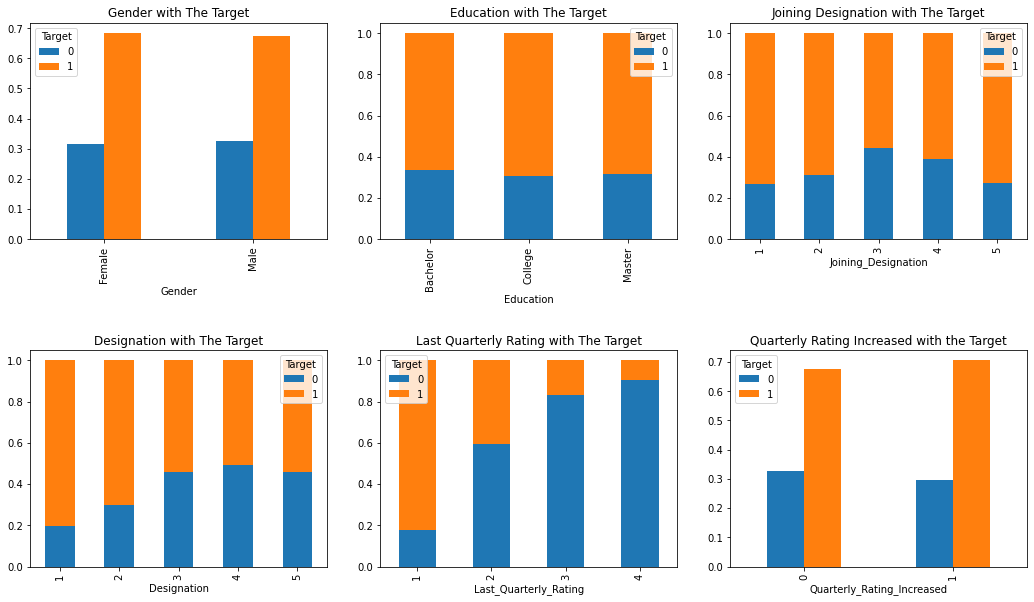

In [30]:
figure,axes=plt.subplots(2,3,figsize=(15,9))

#Gender feature with Target
gender = pd.crosstab(df['Gender'],df['Target'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[0,0],title="Gender with The Target")

#Education feature with Target
education = pd.crosstab(df['Education'],df['Target'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,1],
                                                          title="Education with The Target")

#Joining Designation feature with Target
jde = pd.crosstab(df['Joining_Designation'],df['Target'])
jde.div(jde.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,2],
                                                      title="Joining Designation with The Target")

#Designation feature with Target
desig = pd.crosstab(df['Designation'],df['Target'])
desig.div(desig.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,0],
                                                    title="Designation with The Target")

#Last Quarterly Rating feature with Target
lqrate = pd.crosstab(df['Last_Quarterly_Rating'],df['Target'])
lqrate.div(lqrate.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,1],
                                                      title="Last Quarterly Rating with The Target")

#Quarterly Rating Increased feature with Target
qratei = pd.crosstab(df['Quarterly_Rating_Increased'],df['Target'])
qratei.div(qratei.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[1,2],
                                                         title="Quarterly Rating Increased with the Target")

plt.tight_layout(pad=3)

- **The proportion of gender and education is more or less the same for both the employees who left the organization and those who did not leave.**
- **The employees who have their designation as 3 or 4 at the time of joining are less likely to leave the organization.**
- **The employees who have their designation as 3 or 4 at the time of reporting are less likely to leave the organization.**
- **The employees who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.**
- **The employees whose quarterly rating has increased are less likely to leave the organization.**

<Figure size 2160x504 with 0 Axes>

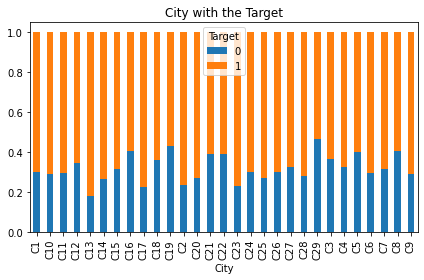

In [31]:
#City feature with the target
plt.figure(figsize=(30,7))
city = pd.crosstab(df['City'],df['Target'])
city.div(city.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="City with the Target")
plt.tight_layout()

### Numerical Variables with the Target Variable

#### Age

<AxesSubplot:title={'center':'Age with Target'}, xlabel='Age_Bin'>

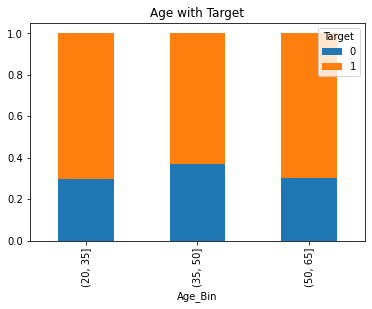

In [32]:
#Binning the Age into categories
df['Age_Bin'] = pd.cut(df['Age'],bins=[20,35,50,65])

#Age feature with Target
agebin = pd.crosstab(df['Age_Bin'],df['Target'])
agebin.div(agebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Age with Target")

**The employees whose age is in the 20-35 or 50-65 groups are less likely to leave the organization.**

#### Salary

<AxesSubplot:title={'center':'Salary with Target'}, xlabel='Salary_Bin'>

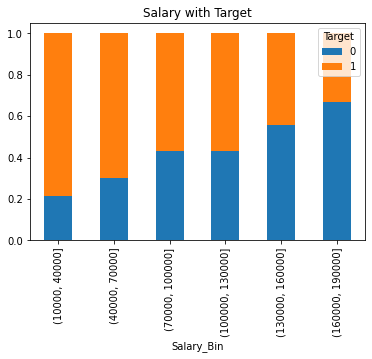

In [33]:
#Binning the Salary into categories
df['Salary_Bin'] = pd.cut(df['Salary'],bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000 ])

#Salary feature with Target
salarybin = pd.crosstab(df['Salary_Bin'],df['Target'])
salarybin.div(salarybin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Salary with Target")

**The employees whose monthly income is in 1,60,000-1,90,000 or 1,30,000-1,60,000 are less likely to leave the organization.**

#### Total Business Value

<AxesSubplot:title={'center':'Total Business Value with Target'}, xlabel='TBV_Bin'>

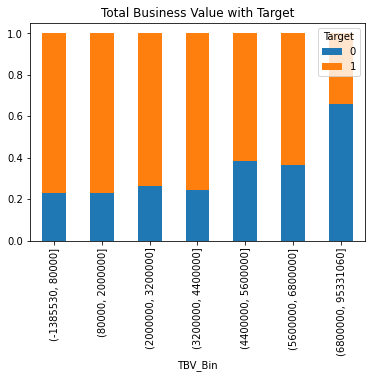

In [34]:
#Defining the bins and groups
m1 = round(df['Total_Business_Value'].min())
m2 = round(df['Total_Business_Value'].max())
bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2]

#Binning the Total Business Value into categories
df['TBV_Bin'] = pd.cut(df['Total_Business_Value'],bins)

#Total Business Value feature with Target
tbvbin = pd.crosstab(df['TBV_Bin'],df['Target'])
tbvbin.div(tbvbin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Total Business Value with Target")

**The employees who have acquired total business value greater than 68,00,000 are less likely to leave the organiztion.**

In [35]:
#Dropping the bins columns
df.drop(['Age_Bin','Salary_Bin','TBV_Bin'],axis=1,inplace=True)

## Label Encoding and One Hot Encoding

In [36]:
#Gender encoding
df['Gender'] = df['Gender'].astype('category')
df['Gender_encode'] = df['Gender'].cat.codes

In [37]:
#One hot encoding for City, Education, Joining_Designation, Designation, Last_Quarterly_Rating
df = pd.concat([df,pd.get_dummies(df['City'],prefix='City')],axis=1)

df = pd.concat([df,pd.get_dummies(df['Education'],prefix='Education')],axis=1)

df = pd.concat([df,pd.get_dummies(df['Joining_Designation'],prefix='JDesignation')],axis=1)

df = pd.concat([df,pd.get_dummies(df['Designation'],prefix='Designation')],axis=1)

df = pd.concat([df,pd.get_dummies(df['Last_Quarterly_Rating'],prefix='LQR')],axis=1)

## Scaling the data

In [38]:
#MinMaxScaler
scaler = MinMaxScaler()

#Mathematically learning the distribution
df['Age_scaled'] = scaler.fit_transform((df['Age'].values).reshape(-1,1))
df['Salary_scaled'] = scaler.fit_transform((df['Salary'].values).reshape(-1,1))
df['Business _Value_scaled']=scaler.fit_transform((df['Total_Business_Value'].values).reshape(-1,1))

## Dropping the encoded and scaled columns

In [39]:
df1=df.copy()
df.drop(['Emp_ID', 'Age', 'Gender', 'City', 'Education', 'Salary',
       'Joining_Designation', 'Designation', 'Total_Business_Value'],axis=1,inplace=True)

## Feature Variables and Target Variable

In [40]:
#Feature Variables
X = df.drop('Target',axis=1)

#Target Variable
y = df['Target']

## Random Forest Classifier

### Develop the model

In [41]:
param = {'max_depth':[4,5,6,7,8,9,10], 'n_estimators':[50,100,150,200,250]}

random_forest = RandomForestClassifier()

c = GridSearchCV(random_forest,param,cv=5,scoring='f1')
c.fit(X,y)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 10, 'n_estimators': 250}
The score is : 0.8700800260940318


In [42]:
decision_tree = RandomForestClassifier(max_depth=10, n_estimators=250)
rf_model=decision_tree.fit(X,y)

## Submission file

In [43]:
submission = pd.read_csv('C:\\Users\\Magna Peius\\Desktop\\Analytics_Vidhya\\Jobathon\\sample_submission_znWiLZ4.csv')

In [44]:
pred = rf_model.predict(X)

In [45]:
print("The f1-score = ",f1_score(y,pred))

The f1-score =  0.9008595988538682


In [46]:
df1['Pred'] = pred

In [47]:
df1.head()

,Emp_ID,Age,Gender,City,Education,Salary,Joining_Designation,Designation,Total_Business_Value,Last_Quarterly_Rating,...,Designation_4,Designation_5,LQR_1,LQR_2,LQR_3,LQR_4,Age_scaled,Salary_scaled,Business _Value_scaled,Pred
0,1,28,Male,C23,Master,57387,1,1,1715580,2,...,0,0,0,1,0,0,0.189189,0.262508,0.032064,1
1,2,31,Male,C7,Master,67016,2,2,0,1,...,0,0,1,0,0,0,0.270270,0.316703,0.014326,1
2,4,43,Male,C13,Master,65603,2,2,350000,1,...,0,0,1,0,0,0,0.594595,0.308750,0.017944,1
3,5,29,Male,C9,College,46368,1,1,120360,1,...,0,0,1,0,0,0,0.216216,0.200489,0.015570,1
4,6,31,Female,C11,Bachelor,78728,3,3,1265000,2,...,0,0,0,1,0,0,0.270270,0.382623,0.027405,0


In [48]:
submission.head()

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0


In [49]:
empid = submission['Emp_ID']

tr = []

for i in empid:
    tr.append(df1[df1['Emp_ID']==i]['Pred'].item())

In [50]:
submission['Target'] = tr

In [51]:
submission.head()

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0


In [52]:
pd.DataFrame(submission, columns= ['Emp_ID','Target']).to_csv('C:\\Users\\Magna Peius\\Desktop\\Analytics_Vidhya\\Jobathon\\RandomForest4.csv')